In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
dff = pd.read_csv("/content/drive/MyDrive/full_inference/tam/new/tam_conf_full.csv",lineterminator="\n")


In [5]:
tot=pd.read_csv('/content/drive/MyDrive/total_data_twitter.csv',lineterminator="\n")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11,17,24,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
tot=tot[['_id','language','content_type']]

In [7]:
df=dff.merge(tot, on='_id', how='inner')

In [8]:
df=df.drop(['tam_hasoc21codemix_confidence'], axis = 1)


In [11]:
df=df.drop_duplicates(subset=['tweet']) #remove suplicates based on tweet


In [13]:
df=df.loc[df['content_type'] == 'text']


In [14]:
df.shape

(76960, 9)

In [16]:
cols = ['tam_fire20_confidence','tam_eacl21_indic_confidence']
df['mean_all'] = df[cols].mean(axis=1)
df.sort_values(by='mean_all', ascending=False, inplace=True)

In [17]:
df

,Unnamed: 0,_id,tweet_id,tweet,tam_eacl21_indic_confidence,search,tam_fire20_confidence,language,content_type,mean_all
8437,8437,61c5a9427de587f16dcb395f,1441829420625317889,@Itz_DSaravana Thevidiya தனுஷ் தான் ஊருக்கே தெ...,0.86,ஊம்பு,0.99,ta,text,0.925
19512,19512,61c5aeb5525f56e786f23ac2,1285842416776482816,@savukku நீ மூடிட்டு உக்காருடா கோண வாய் bunda....,0.84,பொட்டை,0.99,ta,text,0.915
6328,6328,61c5a83c61db66685ebf9ec7,1449046882177601540,@KrisSrikkanth @faf1307 @ChennaiIPL @KKRiders ...,0.84,கோத்தா,0.99,ta,text,0.915
7002,7002,61c5a89861db66685ebf9f79,1452178895059369985,"@NY6sDG3ah1REVyS @packiarajan கோத்தா பாடு, பொட...",0.83,கோத்தா,0.99,ta,text,0.910
12836,12836,61c5abae525f56e786f2323d,1471776294257840128,@thfvvg பைத்திய கார பொட்ட PUNDAIஒங்கொம்மா PUND...,0.82,பொட்டை,0.99,ta,text,0.905
...,...,...,...,...,...,...,...,...,...,...
85132,85132,61e1390485ff1e72f741928e,1457252408308813829,@Dir_Lokesh சம்பவம்... With @ikamalhaasan ...,0.01,Dir_Lokesh,0.09,ta,text,0.050
78705,78705,61dc0b6711ae5ace4fb52835,1417510436413403137,@arulnithitamil @dirarvindh @MuthaiahG @Ghibra...,0.01,arulnithitamil,0.09,ta,text,0.050
84549,84549,61e130461cf48a3db760ea3c,1406605141063585800,@nikkigalrani @actorvijay @editManii @BussyAna...,0.02,nikkigalrani,0.07,ta,text,0.045
63293,63293,61c5ae7275be87e01fd2fa47,1464625998087868419,@velalarkings @CVamcam @pandi_maravan @Pandiya...,0.02,ஓக்க,0.07,ta,text,0.045


In [18]:
df['mean_all'] = df['mean_all'].apply(lambda x: np.round(x, 2))

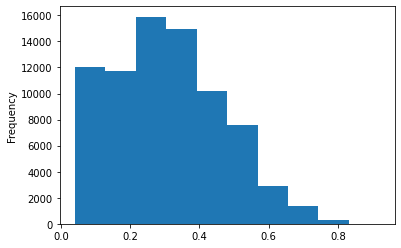

In [19]:
df['mean_all'].plot(kind='hist')

In [20]:
df1= df[df['mean_all'].between(0, 0.5,inclusive='both')]
df2= df[df['mean_all'].between(0.51, 1,inclusive='both')]


In [23]:
df3=df1.sample(n=4000,random_state=2)
df4=df2.sample(n=4000,random_state=2)


In [24]:
frames = [df3,df4]


In [25]:
result = pd.concat(frames)
display(result)

,Unnamed: 0,_id,tweet_id,tweet,tam_eacl21_indic_confidence,search,tam_fire20_confidence,language,content_type,mean_all
86499,86499,61e19aa272115c8f12abc13e,1203040024360636421,@priyaatlee @Atlee_dir இரண்டு பேரும் பக்கத்த...,0.40,priyaatlee,0.13,ta,text,0.26
21908,21908,61c5afee7de587f16dcb4d61,1227190931637637121,@OnlyVijayism @thalayinviswasi @ramk8059 @ramk...,0.54,ஊம்பு,0.11,ta,text,0.32
81500,81500,61e10bc41cf48a3db760b5db,1456037670782738436,@priya_Bshankar அழகான தமிழ் பொண்ணு,0.05,priya_Bshankar,0.12,ta,text,0.08
34226,34226,61c1952c3779a06d1c6584d3,1371869444452978691,"@SPK_TNCC அண்ணா வாழ்த்துகள், நீங்கள் அதிக வாக்...",0.17,அலி,0.25,ta,text,0.21
77883,77883,61cc4c4fd43c3dbf473bebbb,1346004524226396160,@kaviyrasan நீங்க மற்றவர் ட்வீட்க்கு வருவதே அப...,0.50,_SUMI_Twitz_,0.14,ta,text,0.32
...,...,...,...,...,...,...,...,...,...,...
8647,8647,61c5a95673e846c228c44e47,1329476154005147648,ஏற்க்கனவே உங்களுக்கு புஸ்ஸி ஆனந்தா SAC யா னு ய...,0.60,புண்ட,0.47,ta,text,0.53
40292,40292,61c5a77a61db66685ebf9ccc,1336977297014812674,@itz_expiry1 புண்ட விஜய் சுன்னி விஜய் கூதி...,0.44,கோத்தா,0.64,ta,text,0.54
1977,1977,61c1b92d1dec557e2bf8e956,1376094003884486656,ஒன்பது பினாமி கம்பெனிகளை வைத்து அதிக விலைக்குக...,0.70,ஒன்பது,0.58,ta,text,0.64
16077,16077,61c5ad6b7de587f16dcb44b9,1399698089510850565,தலைவன் குஞ்சு மேல செம காண்டுல இருக்காங்க போல.....,0.82,ஊம்பு,0.32,ta,text,0.57


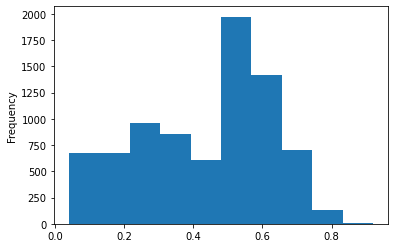

In [26]:
result['mean_all'].plot(kind='hist')

In [27]:
import re
def remove_usernames_links(tweet):
  tweet=re.sub(r'@(\S+)\s?','<handle replaced>',tweet)
  tweet = re.sub('http[^\s]+','',tweet) #remove links
  return tweet
result['tweet_edit'] = result['tweet'].apply(remove_usernames_links)

In [28]:
result

,Unnamed: 0,_id,tweet_id,tweet,tam_eacl21_indic_confidence,search,tam_fire20_confidence,language,content_type,mean_all,tweet_edit
86499,86499,61e19aa272115c8f12abc13e,1203040024360636421,@priyaatlee @Atlee_dir இரண்டு பேரும் பக்கத்த...,0.40,priyaatlee,0.13,ta,text,0.26,<handle replaced><handle replaced>இரண்டு பேரு...
21908,21908,61c5afee7de587f16dcb4d61,1227190931637637121,@OnlyVijayism @thalayinviswasi @ramk8059 @ramk...,0.54,ஊம்பு,0.11,ta,text,0.32,<handle replaced><handle replaced><handle repl...
81500,81500,61e10bc41cf48a3db760b5db,1456037670782738436,@priya_Bshankar அழகான தமிழ் பொண்ணு,0.05,priya_Bshankar,0.12,ta,text,0.08,<handle replaced>அழகான தமிழ் பொண்ணு
34226,34226,61c1952c3779a06d1c6584d3,1371869444452978691,"@SPK_TNCC அண்ணா வாழ்த்துகள், நீங்கள் அதிக வாக்...",0.17,அலி,0.25,ta,text,0.21,"<handle replaced>அண்ணா வாழ்த்துகள், நீங்கள் அத..."
77883,77883,61cc4c4fd43c3dbf473bebbb,1346004524226396160,@kaviyrasan நீங்க மற்றவர் ட்வீட்க்கு வருவதே அப...,0.50,_SUMI_Twitz_,0.14,ta,text,0.32,<handle replaced>நீங்க மற்றவர் ட்வீட்க்கு வருவ...
...,...,...,...,...,...,...,...,...,...,...,...
8647,8647,61c5a95673e846c228c44e47,1329476154005147648,ஏற்க்கனவே உங்களுக்கு புஸ்ஸி ஆனந்தா SAC யா னு ய...,0.60,புண்ட,0.47,ta,text,0.53,ஏற்க்கனவே உங்களுக்கு புஸ்ஸி ஆனந்தா SAC யா னு ய...
40292,40292,61c5a77a61db66685ebf9ccc,1336977297014812674,@itz_expiry1 புண்ட விஜய் சுன்னி விஜய் கூதி...,0.44,கோத்தா,0.64,ta,text,0.54,<handle replaced>புண்ட விஜய் சுன்னி விஜய் ...
1977,1977,61c1b92d1dec557e2bf8e956,1376094003884486656,ஒன்பது பினாமி கம்பெனிகளை வைத்து அதிக விலைக்குக...,0.70,ஒன்பது,0.58,ta,text,0.64,ஒன்பது பினாமி கம்பெனிகளை வைத்து அதிக விலைக்குக...
16077,16077,61c5ad6b7de587f16dcb44b9,1399698089510850565,தலைவன் குஞ்சு மேல செம காண்டுல இருக்காங்க போல.....,0.82,ஊம்பு,0.32,ta,text,0.57,தலைவன் குஞ்சு மேல செம காண்டுல இருக்காங்க போல.....


In [29]:
rslt=result[['tweet_id','language',	'content_type','tweet_edit']]

In [36]:
rslt

,tweet_id,language,content_type,tweet_edit,image_url
86499,1203040024360636421,ta,text,<handle replaced><handle replaced>இரண்டு பேரு...,[]
21908,1227190931637637121,ta,text,<handle replaced><handle replaced><handle repl...,[]
81500,1456037670782738436,ta,text,<handle replaced>அழகான தமிழ் பொண்ணு,[]
34226,1371869444452978691,ta,text,"<handle replaced>அண்ணா வாழ்த்துகள், நீங்கள் அத...",[]
77883,1346004524226396160,ta,text,<handle replaced>நீங்க மற்றவர் ட்வீட்க்கு வருவ...,[]
...,...,...,...,...,...
8647,1329476154005147648,ta,text,ஏற்க்கனவே உங்களுக்கு புஸ்ஸி ஆனந்தா SAC யா னு ய...,[]
40292,1336977297014812674,ta,text,<handle replaced>புண்ட விஜய் சுன்னி விஜய் ...,[]
1977,1376094003884486656,ta,text,ஒன்பது பினாமி கம்பெனிகளை வைத்து அதிக விலைக்குக...,[]
16077,1399698089510850565,ta,text,தலைவன் குஞ்சு மேல செம காண்டுல இருக்காங்க போல.....,[]


In [34]:
rslt['image_url']='[]'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
rslt.to_csv('tam_pooled_new1.csv',index=False)